In [2]:
import re
import pandas as pd
from pandarallel import pandarallel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk as nltk
import nltk.corpus 
from nltk.corpus import stopwords

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from bertopic import BERTopic

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

In [7]:
import multiprocessing

num_processors = multiprocessing.cpu_count()
workers = num_processors-1
print(f'Available CPUs: {num_processors}')

Available CPUs: 12


In [8]:
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

INFO: Pandarallel will run on 11 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


## Identify Industries

In [7]:
import pandas as pd

In [15]:
df = pd.read_parquet('sentiment_ner.parquet')

In [16]:
healthcare_keywords = [
    "healthcare management", 
    "medical technology", 
    "patient care", 
    "health insurance", 
    "telemedicine", 
    "electronic health records", 
    "healthcare policy", 
    "clinical trials", 
    "medical devices", 
    "public health"
]

entertainment_keywords = [
    "streaming services", 
    "movie production", 
    "music industry", 
    "video games", 
    "live concerts", 
    "television shows", 
    "virtual reality", 
    "entertainment technology", 
    "celebrity news", 
    "film festivals"
]

automobile_keywords = [
    "electric vehicles", 
    "autonomous driving", 
    "car manufacturing", 
    "automotive technology", 
    "vehicle safety", 
    "auto repair", 
    "car design", 
    "automotive industry trends", 
    "car sales", 
    "fuel efficiency"
]

finance_keywords = [
    "financial markets", 
    "investment banking", 
    "personal finance", 
    "fintech", 
    "cryptocurrency", 
    "stock trading", 
    "financial planning", 
    "banking industry", 
    "insurance industry", 
    "wealth management"
]

retail_keywords = [
    "e-commerce", 
    "customer experience", 
    "retail technology", 
    "online shopping", 
    "supply chain management", 
    "retail marketing", 
    "store operations", 
    "consumer behavior", 
    "product merchandising", 
    "retail trends"
]

education_keywords = [
    "e-learning",
    "curriculum development",
    "student engagement",
    "distance education",
    "educational technology",
    "learning management systems",
    "scholarships and grants",
    "academic research",
    "teacher training",
    "special education"
]

legal_keywords = [
    "contract law",
    "litigation",
    "intellectual property",
    "corporate law",
    "criminal defense",
    "legal technology",
    "employment law",
    "environmental law",
    "family law",
    "civil rights"
]

environmental_keywords = [
    "climate change",
    "sustainable development",
    "renewable energy",
    "conservation",
    "pollution control",
    "ecology",
    "environmental policy",
    "waste management",
    "water resources",
    "biodiversity"
]

agriculture_keywords = [
    "sustainable agriculture",
    "crop rotation",
    "organic farming",
    "precision agriculture",
    "agricultural technology",
    "soil health",
    "irrigation management",
    "pest management",
    "agricultural economics",
    "livestock breeding"
]


In [17]:
import pandas as pd
from collections import Counter

industry_keywords = {
    'healthcare': healthcare_keywords,
    'entertainment': entertainment_keywords,
    'automobile': automobile_keywords,
    'finance': finance_keywords,
    'retail': retail_keywords,
    'education': education_keywords,
    'legal': legal_keywords,
    'environment': environmental_keywords,
    'agriculture': agriculture_keywords   
}

def count_keywords_by_industry(row, keyword_dict):
    text = row['clean_text_no_ai'].lower()
    industry_counts = {industry: 0 for industry in keyword_dict}
    for industry, keywords in keyword_dict.items():
        for keyword in keywords:
            if keyword in text:
                industry_counts[industry] += 1
    return industry_counts

df['industry_counts'] = df.apply(count_keywords_by_industry, axis=1, keyword_dict=industry_keywords)

total_counts = Counter()
df['industry_counts'].apply(lambda counts: total_counts.update(counts))

0         None
2         None
7         None
8         None
9         None
          ... 
200428    None
200429    None
200430    None
200432    None
200434    None
Name: industry_counts, Length: 131569, dtype: object

In [14]:
df.head()

date                                     clean_title_v3  \
0  2020-02-26  LegalTech Artificial Intelligence Market  Tech...   
2  2020-03-13  Covid un messaggio dai ricercatori italiani ai...   
7  2021-02-25  MulticoreWare Inc Becomes CEVAs Trusted Partne...   
8  2022-10-06  Healthcare Artificial Intelligence Market Anal...   
9  2020-04-29  Artificial Intelligence As A Service Market Op...   

                                       clean_text_v5  \
0  LegalTech Artificial Intelligence Market Techn...   
2  Covid un messaggio dai ricercatori italiani ai...   
7  MulticoreWare Inc Becomes CEVAs Trusted Partne...   
8  Healthcare Artificial Intelligence Market Anal...   
9  Artificial Intelligence Service Market Opportu...   

                                    clean_text_no_ai  \
0  legaltech  market  advancement future scope ca...   
2  covid un messaggio d ricercatori italiani  col...   
7  multicoreware inc becomes cevas trusted partne...   
8  healthcare  market analysis forecast next year...   
9   service market opportunities market analysis ...   

                                     industry_counts  
0  {'healthcare': 0, 'entertainment': 0, 'automob...  
2  {'healthcare': 1, 'entertainment': 0, 'automob...  
7  {'healthcare': 0, 'entertainment': 1, 'automob...  
8  {'healthcare': 1, 'entertainment': 0, 'automob...  
9  {'healthcare': 0, 'entertainment': 0, 'automob...

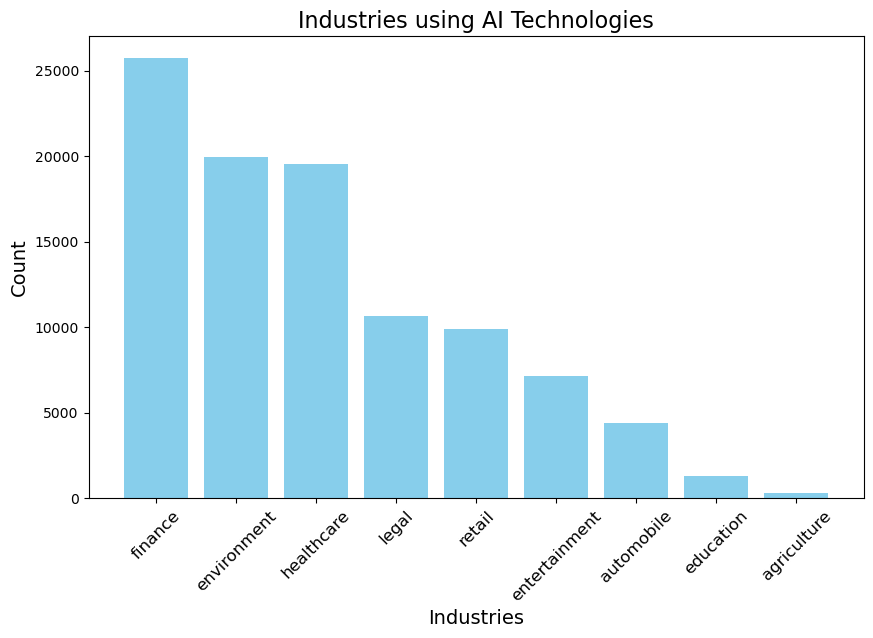

In [25]:
import matplotlib.pyplot as plt

total_counts_dict = dict(total_counts)
sorted_total_counts_dict = dict(sorted(total_counts_dict.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_total_counts_dict.keys(), sorted_total_counts_dict.values(), color='skyblue')
plt.xlabel('Industries', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Industries using AI Technologies', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [ ]:
## industries over time

### Identify new technologies and AI solutions that might be affecting the employment landscape

In [30]:
def count_tech_terms_in_text(text, tech_list):
    text_lower = text.lower()
    tech_count_dict = {tech: 0 for tech in new_tech}

    for tech in new_tech:
        tech_count_dict[tech] += text_lower.count(tech)   
    return tech_count_dict

new_tech = [
    "ai",
    "ml",
    "dl",
    "nlp",
    "cv",
    "quantum computing",
    "blockchain",
    "iot",
    "augmented reality",
    "virtual reality",
    "cybersecurity",
    "cloud",
    "autonomous vehicles",
]

df['tech_counts'] = df['clean_text_v5'].apply(lambda x: count_tech_terms_in_text(x, new_tech))

In [33]:
df['tech_counts'].dtypes

dtype('O')

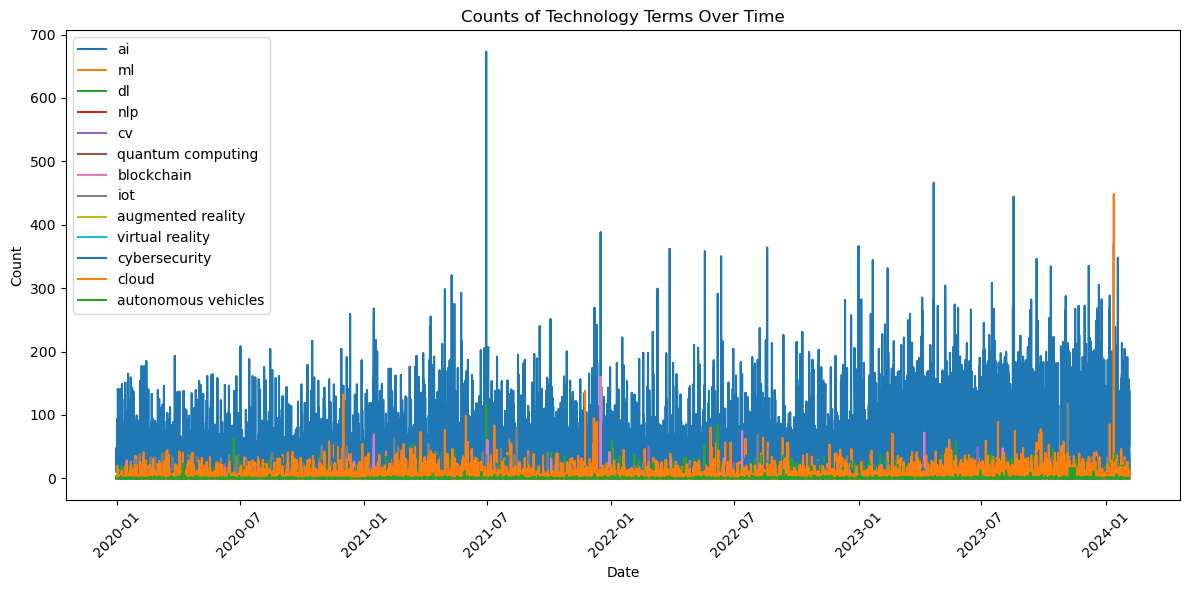

In [32]:
tech_df = pd.DataFrame(columns=['date'] + list(df['tech_counts'][0].keys()))
tech_df['date'] = df['date']

for tech in tech_df.columns[1:]:
    tech_df[tech] = df['tech_counts'].apply(lambda d: d.get(tech, 0))

tech_df.set_index('date', inplace=True)
tech_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
for tech in tech_df.columns:
    plt.plot(tech_df.index, tech_df[tech], label=tech)

plt.title('Counts of Technology Terms Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
no_ai_app = [
    "psychotherapy",
    "jurisprudence",
    "pathology",
    "literature",
    "philosophy",
    "urbanism",
    "diplomacy",
    "statesmanship",
    "crisisManagement",
    "innovation"
]

def check_no_ai_app(text):
    text_lower = text.lower()
    return any(app in text_lower for app in no_ai_app)

df['no_ai_app'] = df['clean_text_v5'].apply(check_no_ai_app).astype(int)

In [39]:
no_ai_app_text = df[df['no_ai_app']==1]['clean_text_no_ai']

In [40]:
ai_keywords = ['Data Science', 'data science', 'DATA SCIENCE','AI', 'ai', 'artificial intelligence','Artificial Intelligence','ARTIFICIAL INTELLIGENCE', 'ML', 'NLP', 
            'Artificial General Intelligence','Chatbots', 'AI Marketplaces', 'Intelligent Applications', 
           'Augmented Intelligence', 'Decision Intelligence', 'AI Cloud Services', 'cloud services', 'GPU Accelerators', 'Computer Vision','Deep Neural Network',
           'Deep Learning','Cognitive Computing','Autonomous Vehicles','Knowledge Graphs', 'Responsible AI', 'Machine Customers', 'Decision Intelligence', 'Autonomous Vehicles',
           'Human-Centered AI', 'AI Governance', 'Natural Language Processing', 'Machine Learning', 'Smart Robots', 'Operational AI Systems' , 'Data-Centric AI', 'AI TRiSM', 'Generative AI',
           'Responsible AI']

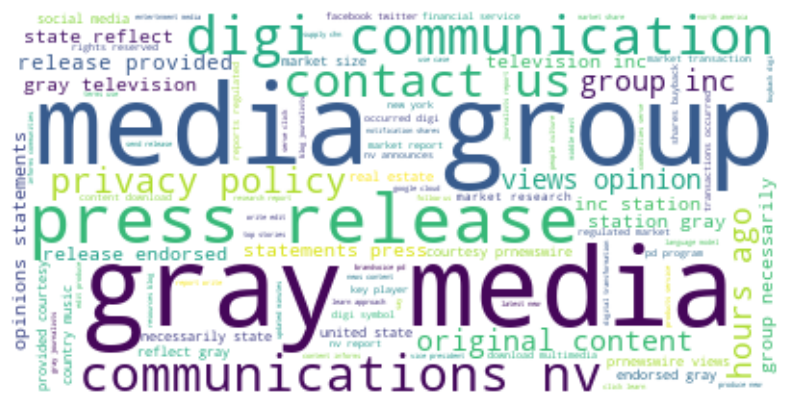

In [48]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

no_ai_app_text = df[df['no_ai_app']==1]['clean_text_no_ai']
text_as_single_string = " ".join(no_ai_app_text.astype(str))

stopwords = set(STOPWORDS)
stopwords.update(ai_keywords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_as_single_string)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
df.head()

date                                     clean_title_v3  \
0  2020-02-26  LegalTech Artificial Intelligence Market  Tech...   
2  2020-03-13  Covid un messaggio dai ricercatori italiani ai...   
7  2021-02-25  MulticoreWare Inc Becomes CEVAs Trusted Partne...   
8  2022-10-06  Healthcare Artificial Intelligence Market Anal...   
9  2020-04-29  Artificial Intelligence As A Service Market Op...   

                                       clean_text_v5  \
0  LegalTech Artificial Intelligence Market Techn...   
2  Covid un messaggio dai ricercatori italiani ai...   
7  MulticoreWare Inc Becomes CEVAs Trusted Partne...   
8  Healthcare Artificial Intelligence Market Anal...   
9  Artificial Intelligence Service Market Opportu...   

                                    clean_text_no_ai  sentiment_model_text  \
0  legaltech  market  advancement future scope ca...                     1   
2  covid un messaggio d ricercatori italiani  col...                     1   
7  multicoreware inc becomes cevas trusted partne...                     0   
8  healthcare  market analysis forecast next year...                     1   
9   service market opportunities market analysis ...                     1   

  sentiment_model_cat_text  sentiment_model sentiment_model_cat  \
0                 Positive                1            Positive   
2                 Positive                0            Negative   
7                 Negative                0            Negative   
8                 Positive                0            Negative   
9                 Positive                0            Negative   

                                             Persons  \
0  Australis Galus, Agrident AllflexContact, UsIr...   
2  dai ricercatori italiani ai, Di la tua Tempo, ...   
7  Erez Natan, Soumendra Mohanty VicePresident Wo...   
8                                      Nidhi Bhawsar   
9                                    ForecastQiu Qiu   

                                       Organizations  \
0  LegalTech, Sony, Roche Diagnostics Veterinary ...   
2  stranieri AgoraVox Italia Accedi Partecipa, Ag...   
7  MulticoreWare Inc Becomes CEVAs Trusted Partne...   
8  Healthcare Artificial Intelligence Market Anal...   
9  Artificial Intelligence Service Market Opportu...   

                                           locations  \
0  Australis, US, United States, China, Japan, In...   
2  Italy, Italy, Italy, Peoples Republic China Fi...   
7                         SAN JOSE CalifBUSINESS Inc   
8  RD, India, China, Canada, Mexico, Brazil, Arge...   
9  China, Malaysia, Japan, Philippines, Korea, Th...   

                                     industry_counts  \
0  {'healthcare': 0, 'entertainment': 0, 'automob...   
2  {'healthcare': 1, 'entertainment': 0, 'automob...   
7  {'healthcare': 0, 'entertainment': 1, 'automob...   
8  {'healthcare': 1, 'entertainment': 0, 'automob...   
9  {'healthcare': 0, 'entertainment': 0, 'automob...   

                                         tech_counts  no_ai_app  
0  {'ai': 8, 'ml': 0, 'dl': 5, 'nlp': 0, 'cv': 0,...          1  
2  {'ai': 32, 'ml': 0, 'dl': 4, 'nlp': 0, 'cv': 0...          1  
7  {'ai': 10, 'ml': 0, 'dl': 0, 'nlp': 0, 'cv': 0...          0  
8  {'ai': 16, 'ml': 0, 'dl': 2, 'nlp': 0, 'cv': 0...          0  
9  {'ai': 14, 'ml': 1, 'dl': 2, 'nlp': 0, 'cv': 0...          0

In [53]:
df_pos = df[df['sentiment_model_cat_text']=='Positive']
df_neg = df[df['sentiment_model_cat_text']=='Negative']

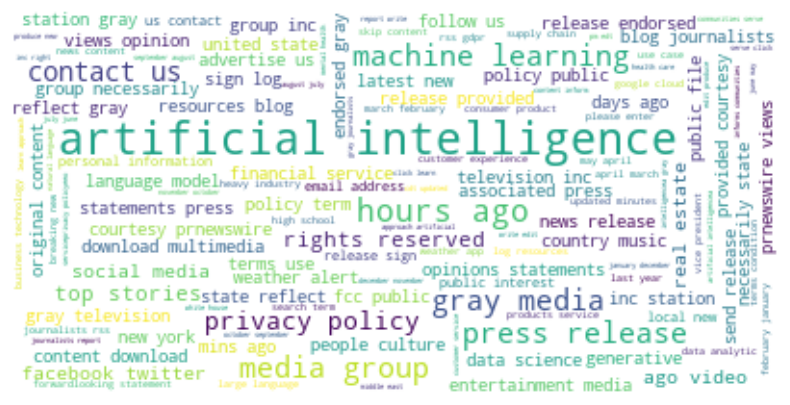

In [54]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text_neg = df_neg['clean_text_v5']
text_str_neg = " ".join(text_neg.apply(lambda x: x.lower()).astype(str))

stopwords = set(STOPWORDS)
stopwords.update(ai_keywords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_str_neg)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
df.to_parquet('industry_segmentation.parquet')

### BERTopic

In [ ]:
df = pd.read_parquet('industry_segmentation.parquet')

In [6]:
df.head(2)

date  \
0  2020-02-26   
2  2020-03-13   

                                                                                                                                       clean_title_v3  \
0  LegalTech Artificial Intelligence Market  Technology Advancement and Future Scope Casetext Inc Catalyst Repository Systems eBREVIA Galus Australis   
2                                                                   Covid un messaggio dai ricercatori italiani ai colleghi stranieri AgoraVox Italia   

                                                                                                                                                                                             clean_text_v5  \
0  LegalTech Artificial Intelligence Market Technology Advancement Future Scope Casetext Inc Catalyst Repository Systems eBREVIA Galus Australis Galus Australis Wednesday February Trending Needle Cou...   
2  Covid un messaggio dai ricercatori italiani ai colleghi stranieri AgoraVox Italia Accedi Partecipa ad AgoraVox Iscriviti e proponi un articolo Home page Attualita Ambiente Cronaca Cronaca Locale C...   

                                                                                                                                                                                          clean_text_no_ai  \
0  legaltech  market  advancement future scope casetext inc catalyst repository systems ebrevia galus australis galus australis wednesday february trending needle counters market comprehensive study ...   
2  covid un messaggio d ricercatori italiani  colleghi stranieri agoravox italia accedi partecipa ad agoravox iscriviti e proponi un articolo home page attualita ambiente cronaca cronaca locale cultu...   

                                                                                                                                     industry_counts  
0  {'agriculture': 0, 'automobile': 0, 'education': 0, 'entertainment': 0, 'environment': 0, 'finance': 0, 'healthcare': 0, 'legal': 0, 'retail': 0}  
2  {'agriculture': 0, 'automobile': 0, 'education': 0, 'entertainment': 0, 'environment': 0, 'finance': 0, 'healthcare': 1, 'legal': 0, 'retail': 0}

In [12]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("BAAI/bge-base-en-v1.5")

model = BERTopic(verbose=True, nr_topics= 11,  n_gram_range=(1, 2))
topics, probabilities = model.fit_transform(df['clean_text_no_ai'].values)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/repos/be/03/be031ecb378efc205fd78e616ee4ef4ff07b82a4a6483e6c0aa660bec80c0144/c7c1988aae201f80cf91a5dbbd5866409503b89dcaba877ca6dba7dd0a5167d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1709707283&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwOTcwNzI4M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9iZS8wMy9iZTAzMWVjYjM3OGVmYzIwNWZkNzhlNjE2ZWU0ZWY0ZmYwN2I4MmE0YTY0ODNlNmMwYWE2NjBiZWM4MGMwMTQ0L2M3YzE5ODhhYWUyMDFmODBjZjkxYTVkYmJkNTg2NjQwOTUwM2I4OWRjYWJhODc3Y2E2ZGJhN2RkMGE1MTY3ZDc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qIn1dfQ__&Signature=Br04Bxea4PqnxoxYeBY8QqZohVawaBE%7EM5lyw%7ErYb6PjaMOVSszvw8WPIZtuD0UdphEGDwKxrL8vYYoJl9YNbgqcthfgrrOsZJiy7i58KETtT3Sfa5ugFJlvOLcPNlpun-TCGYdH0ylo0dDscOqQf5i8ZRmT3R8WOEQSKRq8idje5raQ9xTt1uvCseOTqCkXaT%7EJ9OYGjth5ifOUuhdGT0Qhoy1WoQV2bAIGMRAbwcmB

model.safetensors:  12%|#1        | 52.4M/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-03-03 00:54:19,116 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/4112 [00:00<?, ?it/s]

2024-03-03 03:10:58,036 - BERTopic - Embedding - Completed ✓
2024-03-03 03:10:58,036 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-03 03:13:37,188 - BERTopic - Dimensionality - Completed ✓
2024-03-03 03:13:37,265 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-03 03:13:56,258 - BERTopic - Cluster - Completed ✓
2024-03-03 03:13:56,258 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-03 03:26:18,618 - BERTopic - Representation - Completed ✓
2024-03-03 03:26:21,369 - BERTopic - Topic reduction - Reducing number of topics
2024-03-03 03:51:54,990 - BERTopic - Topic reduction - Reduced number of topics from 3185 to 11


In [13]:
import pickle

with open('bert_model.pkl', 'wb') as f:
    pickle.dump(model, f)

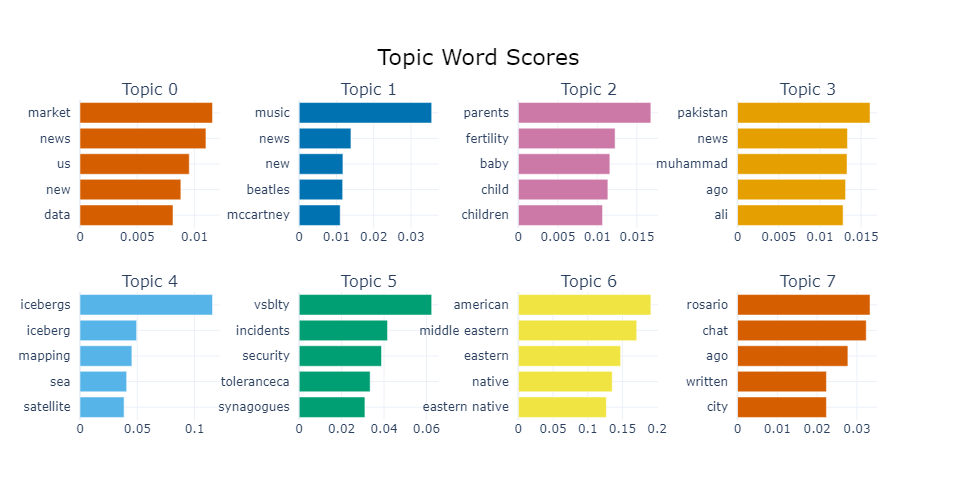

In [14]:
model.visualize_barchart()

In [15]:
model.get_topic_info()

Topic   Count                                      Name  \
0      -1   28902                     -1_news_us_market_new   
1       0  100213                      0_market_news_us_new   
2       1    1304                  1_music_news_new_beatles   
3       2     639            2_parents_fertility_baby_child   
4       3     219              3_pakistan_news_muhammad_ago   
5       4     126            4_icebergs_iceberg_mapping_sea   
6       5      54   5_vsblty_incidents_security_toleranceca   
7       6      45  6_american_middle eastern_eastern_native   
8       7      38                7_rosario_chat_ago_written   
9       8      17            8_fuzzy_zadeh_fuzzy logic_prof   
10      9      12  9_chickfila_delivery_refraction_lastmile   

                                                                                                                           Representation  \
0                                                                        [news, us, market, new, data, business, use, sd, also, industry]   
1                                                                      [market, news, us, new, data, business, media, global, report, sd]   
2                                                                   [music, news, new, beatles, mccartney, song, ago, artists, us, voice]   
3                                                                [parents, fertility, baby, child, children, ivf, gray, health, sd, care]   
4                                                             [pakistan, news, muhammad, ago, ali, muhammad ali, khan, weapons, next, us]   
5                                                [icebergs, iceberg, mapping, sea, satellite, antarctic, ice, sentinel, fry, fry circles]   
6                 [vsblty, incidents, security, toleranceca, synagogues, antisemitic incidents, antisemitic, vsbgf, cctv cameras, threat]   
7   [american, middle eastern, eastern, native, eastern native, native american, african american, asian, hispanic indian, indian middle]   
8                                                        [rosario, chat, ago, written, city, ordinance, remark, porto, alegre, sossmeier]   
9                                        [fuzzy, zadeh, fuzzy logic, prof, the father, zac, father fuzzy, prof lotfi, lotfi zadeh, lotfi]   
10           [chickfila, delivery, refraction, lastmile, restaurant, restaurants, chickfila restaurants, autonomous, refractions, austin]   

                                                                                                                                                                                        Representative_Docs  
0   [contract  company evisort ranks no inc resources blog journalists log sign data privacy send release news products contact search search typing field list search results appear automatically upda...  
1   [google cloud shares new research outlook generative  retl resources blog journalists log sign data privacy send release news products contact search search typing field list search results appear...  
2   [beatles releasing final record help  | ktab skip content ktab abilene sign abilene sponsored toggle menu open navigation close navigation search please enter search term primary menu news local n...  
3   [magic opaque  tool may flag parents disabilities skip mn content turn refresh currently reading magic opaque  tool may flag parents disabilities subscribe subscribe eedition sign searchcontact no...  
4   [pakistan stunned party imprisoned expm khan uses  replicate voice speech | wntz cenlanowcom skip content wntz cenlanowcom alexandria sign alexandria sponsored toggle menu open navigation close na...  
5   [exploring unseen sentinel satellites  revolutionize iceberg mapping sleppa yfir i innihaldlau november nyja taekni og kraft gervigreindar samband visindi exploring unseen sentinel satellites  rev...  
6   [vsbltys   protects one americas largest synagogues skip alert seen things doits photos newscastsfirst alert

In [19]:
topics_keywords = model.get_topics()
keywords_df_list = []
for i in range(len(topics_keywords)-1):
    topic_df = pd.DataFrame(topics_keywords[i])
    keywords_df_list.append(topic_df)

keywords_list_br = [keywords_list[i:i + 10] for i in range(0, len(keywords_list), 10)]
index_labels = [f'Topic_{i}' for i in range(len(keywords_list_br))]
keywords_df = pd.DataFrame(keywords_list_br, index=index_labels)

In [20]:
keywords_df.head()

0          1         2        3          4             5  \
Topic_0    market       news        us      new       data      business   
Topic_1     music       news       new  beatles  mccartney          song   
Topic_2   parents  fertility      baby    child   children           ivf   
Topic_3  pakistan       news  muhammad      ago        ali  muhammad ali   
Topic_4  icebergs    iceberg   mapping      sea  satellite     antarctic   

             6         7       8            9  
Topic_0  media    global  report           sd  
Topic_1    ago   artists      us        voice  
Topic_2   gray    health      sd         care  
Topic_3   khan   weapons    next           us  
Topic_4    ice  sentinel     fry  fry circles

In [21]:
keywords_df.to_csv("bert_topic.csv", index = False)

In [22]:
df['Topic'] = topics

In [23]:
df.head()

date  \
0  2020-02-26   
2  2020-03-13   
7  2021-02-25   
8  2022-10-06   
9  2020-04-29   

                                                                                                                                       clean_title_v3  \
0  LegalTech Artificial Intelligence Market  Technology Advancement and Future Scope Casetext Inc Catalyst Repository Systems eBREVIA Galus Australis   
2                                                                   Covid un messaggio dai ricercatori italiani ai colleghi stranieri AgoraVox Italia   
7                                                MulticoreWare Inc Becomes CEVAs Trusted Partner for Imaging Computer Vision Consumer Electronics Net   
8                                                                     Healthcare Artificial Intelligence Market Analysis and Forecast for Next  Years   
9                                        Artificial Intelligence As A Service Market Opportunities Market Analysis Outlook To  0w Market News Reports   

                                                                                                                                                                                             clean_text_v5  \
0  LegalTech Artificial Intelligence Market Technology Advancement Future Scope Casetext Inc Catalyst Repository Systems eBREVIA Galus Australis Galus Australis Wednesday February Trending Needle Cou...   
2  Covid un messaggio dai ricercatori italiani ai colleghi stranieri AgoraVox Italia Accedi Partecipa ad AgoraVox Iscriviti e proponi un articolo Home page Attualita Ambiente Cronaca Cronaca Locale C...   
7  MulticoreWare Inc Becomes CEVAs Trusted Partner Imaging Computer Vision Consumer Electronics Net Skip content Consumer Electronics Net Primary Menu Consumer Electronics Net Search for Inc Becomes ...   
8  Healthcare Artificial Intelligence Market Analysis Forecast Next Years SBWire Sign Login Service Plans Pricing Newsroom Help AMA Research Media LLP Email Alerts| RSS Healthcare Artificial Intellig...   
9  Artificial Intelligence Service Market Opportunities Market Analysis Outlook Market News Reports Contact Us Us Market News Reports Market Reports Analytics News Market Reports Industry Analytics I...   

                                                                                                                                                                                          clean_text_no_ai  \
0  legaltech  market  advancement future scope casetext inc catalyst repository systems ebrevia galus australis galus australis wednesday february trending needle counters market comprehensive study ...   
2  covid un messaggio d ricercatori italiani  colleghi stranieri agoravox italia accedi partecipa ad agoravox iscriviti e proponi un articolo home page attualita ambiente cronaca cronaca locale cultu...   
7  multicoreware inc becomes cevas trusted partner imaging  consumer electronics net skip content consumer electronics net primary menu consumer electronics net search for inc becomes cevas trusted p...   
8  healthcare  market analysis forecast next years sbwire sign login service plans pricing newsroom help ama research media llp e alerts| rss healthcare  market next big thing major giants general el...   
9   service market opportunities market analysis outlook market news reports contact us us market news reports market reports  news market reports industry  industry reports market research business ...   

                                                                                                                                     industry_counts  \
0  {'agriculture': 0, 'automobile': 0, 'education': 0, 'entertainment': 0, 'environment': 0, 'finance': 0, 'healthcare': 0, 'legal': 0, 'retail': 0}   
2  {'agriculture': 0, 'automobile': 0, 'education': 0, 'entertainment': 0, 'environment': 0, 'finance': 0, 'healthcare': 1, 'legal': 0, 'retail': 0}   
7  {'agriculture': 0, 'automobile': 2, 'education': 0, 'e

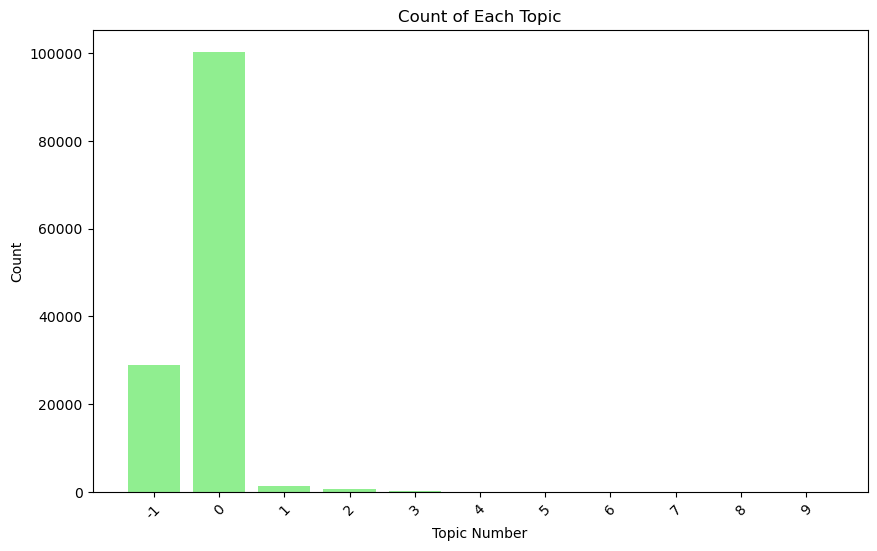

In [30]:
import seaborn as sns

topic_counts = df['Topic'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index.astype(str), topic_counts.values, color='lightgreen')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.title('Count of Each Topic')
plt.xticks(rotation=45)
plt.show()

In [31]:
df.head()

date  \
0  2020-02-26   
2  2020-03-13   
7  2021-02-25   
8  2022-10-06   
9  2020-04-29   

                                                                                                                                       clean_title_v3  \
0  LegalTech Artificial Intelligence Market  Technology Advancement and Future Scope Casetext Inc Catalyst Repository Systems eBREVIA Galus Australis   
2                                                                   Covid un messaggio dai ricercatori italiani ai colleghi stranieri AgoraVox Italia   
7                                                MulticoreWare Inc Becomes CEVAs Trusted Partner for Imaging Computer Vision Consumer Electronics Net   
8                                                                     Healthcare Artificial Intelligence Market Analysis and Forecast for Next  Years   
9                                        Artificial Intelligence As A Service Market Opportunities Market Analysis Outlook To  0w Market News Reports   

                                                                                                                                                                                             clean_text_v5  \
0  LegalTech Artificial Intelligence Market Technology Advancement Future Scope Casetext Inc Catalyst Repository Systems eBREVIA Galus Australis Galus Australis Wednesday February Trending Needle Cou...   
2  Covid un messaggio dai ricercatori italiani ai colleghi stranieri AgoraVox Italia Accedi Partecipa ad AgoraVox Iscriviti e proponi un articolo Home page Attualita Ambiente Cronaca Cronaca Locale C...   
7  MulticoreWare Inc Becomes CEVAs Trusted Partner Imaging Computer Vision Consumer Electronics Net Skip content Consumer Electronics Net Primary Menu Consumer Electronics Net Search for Inc Becomes ...   
8  Healthcare Artificial Intelligence Market Analysis Forecast Next Years SBWire Sign Login Service Plans Pricing Newsroom Help AMA Research Media LLP Email Alerts| RSS Healthcare Artificial Intellig...   
9  Artificial Intelligence Service Market Opportunities Market Analysis Outlook Market News Reports Contact Us Us Market News Reports Market Reports Analytics News Market Reports Industry Analytics I...   

                                                                                                                                                                                          clean_text_no_ai  \
0  legaltech  market  advancement future scope casetext inc catalyst repository systems ebrevia galus australis galus australis wednesday february trending needle counters market comprehensive study ...   
2  covid un messaggio d ricercatori italiani  colleghi stranieri agoravox italia accedi partecipa ad agoravox iscriviti e proponi un articolo home page attualita ambiente cronaca cronaca locale cultu...   
7  multicoreware inc becomes cevas trusted partner imaging  consumer electronics net skip content consumer electronics net primary menu consumer electronics net search for inc becomes cevas trusted p...   
8  healthcare  market analysis forecast next years sbwire sign login service plans pricing newsroom help ama research media llp e alerts| rss healthcare  market next big thing major giants general el...   
9   service market opportunities market analysis outlook market news reports contact us us market news reports market reports  news market reports industry  industry reports market research business ...   

                                                                                                                                     industry_counts  \
0  {'agriculture': 0, 'automobile': 0, 'education': 0, 'entertainment': 0, 'environment': 0, 'finance': 0, 'healthcare': 0, 'legal': 0, 'retail': 0}   
2  {'agriculture': 0, 'automobile': 0, 'education': 0, 'entertainment': 0, 'environment': 0, 'finance': 0, 'healthcare': 1, 'legal': 0, 'retail': 0}   
7  {'agriculture': 0, 'automobile': 2, 'education': 0, 'e

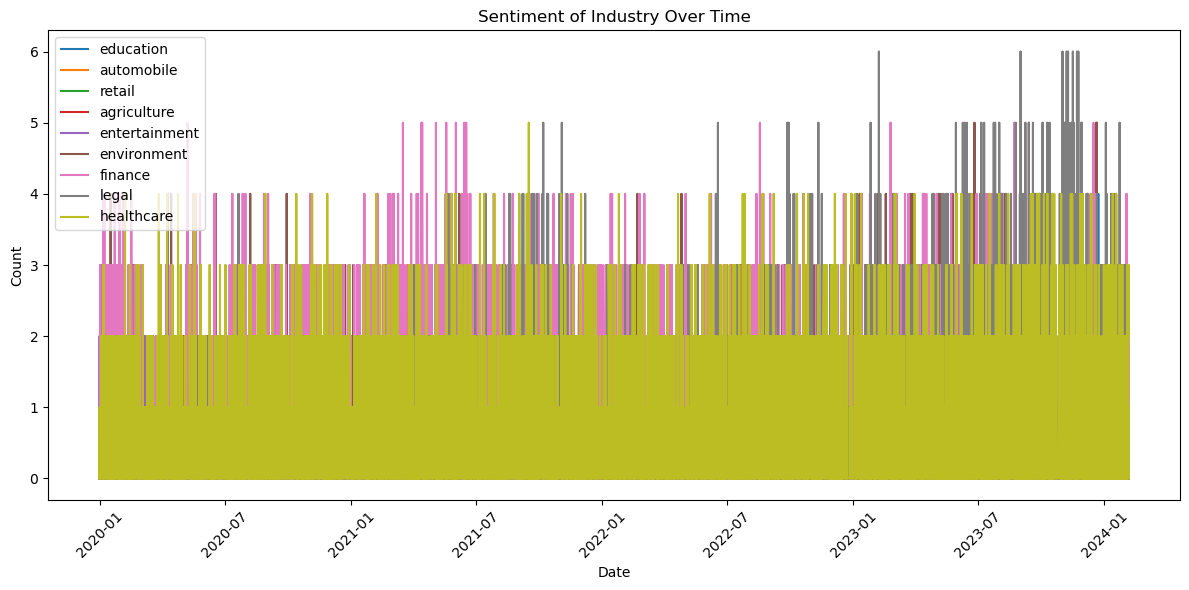

In [71]:
all_keys = set()
for dct in df['industry_counts'][0]:
    all_keys.update(dct.keys())

industry_df = pd.DataFrame(columns=['date'] + list(all_keys))
industry_df['date'] = df['date']

for industry in industry_df.columns[1:]:
    industry_df[industry] = df['industry_counts'].apply(lambda d_list: sum(d.get(industry, 0) for d in d_list))
    
industry_df.set_index('date', inplace=True)
industry_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
for industry in industry_df.columns:
    plt.plot(industry_df.index, industry_df[industry], label=industry)

plt.title('Sentiment of Industry Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

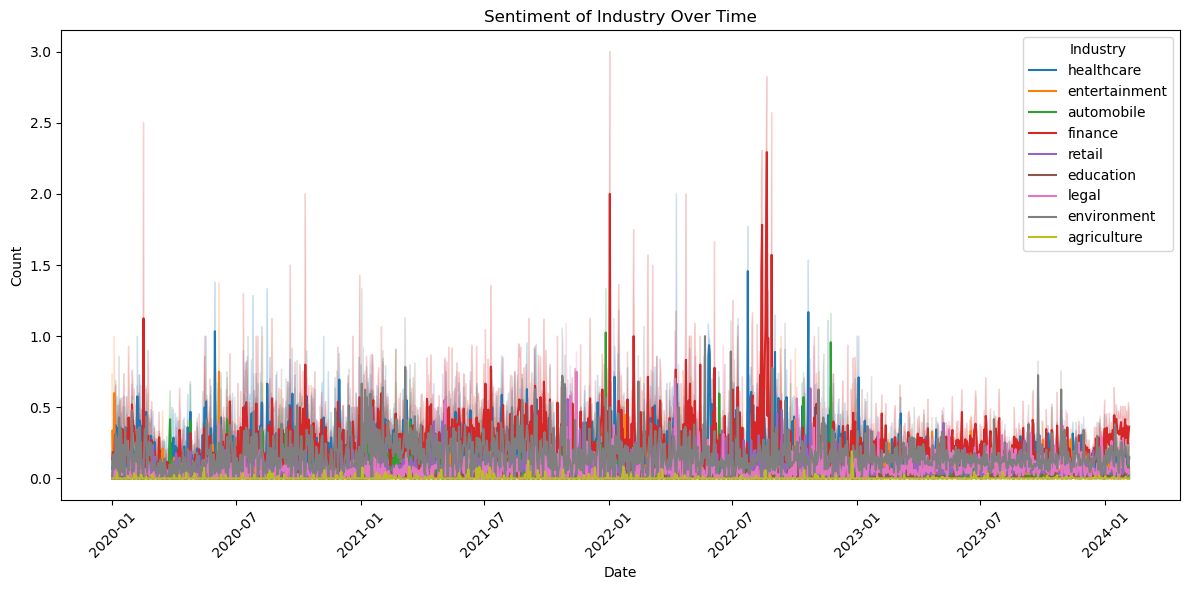

In [72]:
flattened_data = []

for index, row in df.iterrows():
    date = row['date']
    for industry_count_dict in row['industry_counts']:
        for industry, count in industry_count_dict.items():
            flattened_data.append({
                'date': date,
                'industry': industry,
                'count': count
            })

flattened_df = pd.DataFrame(flattened_data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=flattened_df, x='date', y='count', hue='industry')
plt.title('Sentiment of Industry Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.tight_layout()
plt.show()